In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv
/kaggle/input/global-weather-repository/state.db


In [2]:
import random

seed = 845
random.seed(seed)
np.random.seed(seed)

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
df.head(10)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1715849100,2024-05-16 04:45,26.0,78.8,Partly cloudy,5.6,9.0,90,E,1013.0,29.91,0.02,0.00,84,25,28.2,82.8,10.0,6.0,1.0,15.7,25.3,220.3,29.0,0.2,0.2,1.2,4.5,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1715849100,2024-05-16 05:45,8.0,46.4,Clear,2.2,3.6,10,N,1014.0,29.94,0.00,0.00,93,0,7.1,44.9,10.0,6.0,1.0,6.5,10.5,270.4,7.7,8.3,1.3,4.0,5.3,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55
7,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45,19.0,66.2,Partly cloudy,4.3,6.8,140,SE,1017.0,30.03,0.13,0.01,40,25,19.0,66.2,10.0,6.0,4.0,6.2,9.9,186.9,103.0,1.0,0.3,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,1715849100,2024-05-16 18:45,9.0,48.2,Clear,2.5,4.0,100,E,1027.0,30.33,0.00,0.00,87,0,9.1,48.5,10.0,6.0,1.0,3.3,5.3,277.0,26.8,15.1,1.0,3.7,5.4,1,1,06:52 AM,05:07 PM,01:31 PM,No moonset,Waxing Gibbous,55
9,Austria,Vienna,48.20,16.37,Europe/Vienna,1715849100,2024-05-16 10:45,16.0,60.8,Partly cloudy,12.5,20.2,110,ESE,1013.0,29.91,0.00,0.00,63,75,16.0,60.8,10.0,6.0,5.0,19.8,31.9,220.3,68.7,5.1,4.1,3.7,4.4,1,1,05:14 AM,08:29 PM,01:00 PM,02:42 AM,Waxing Gibbous,55


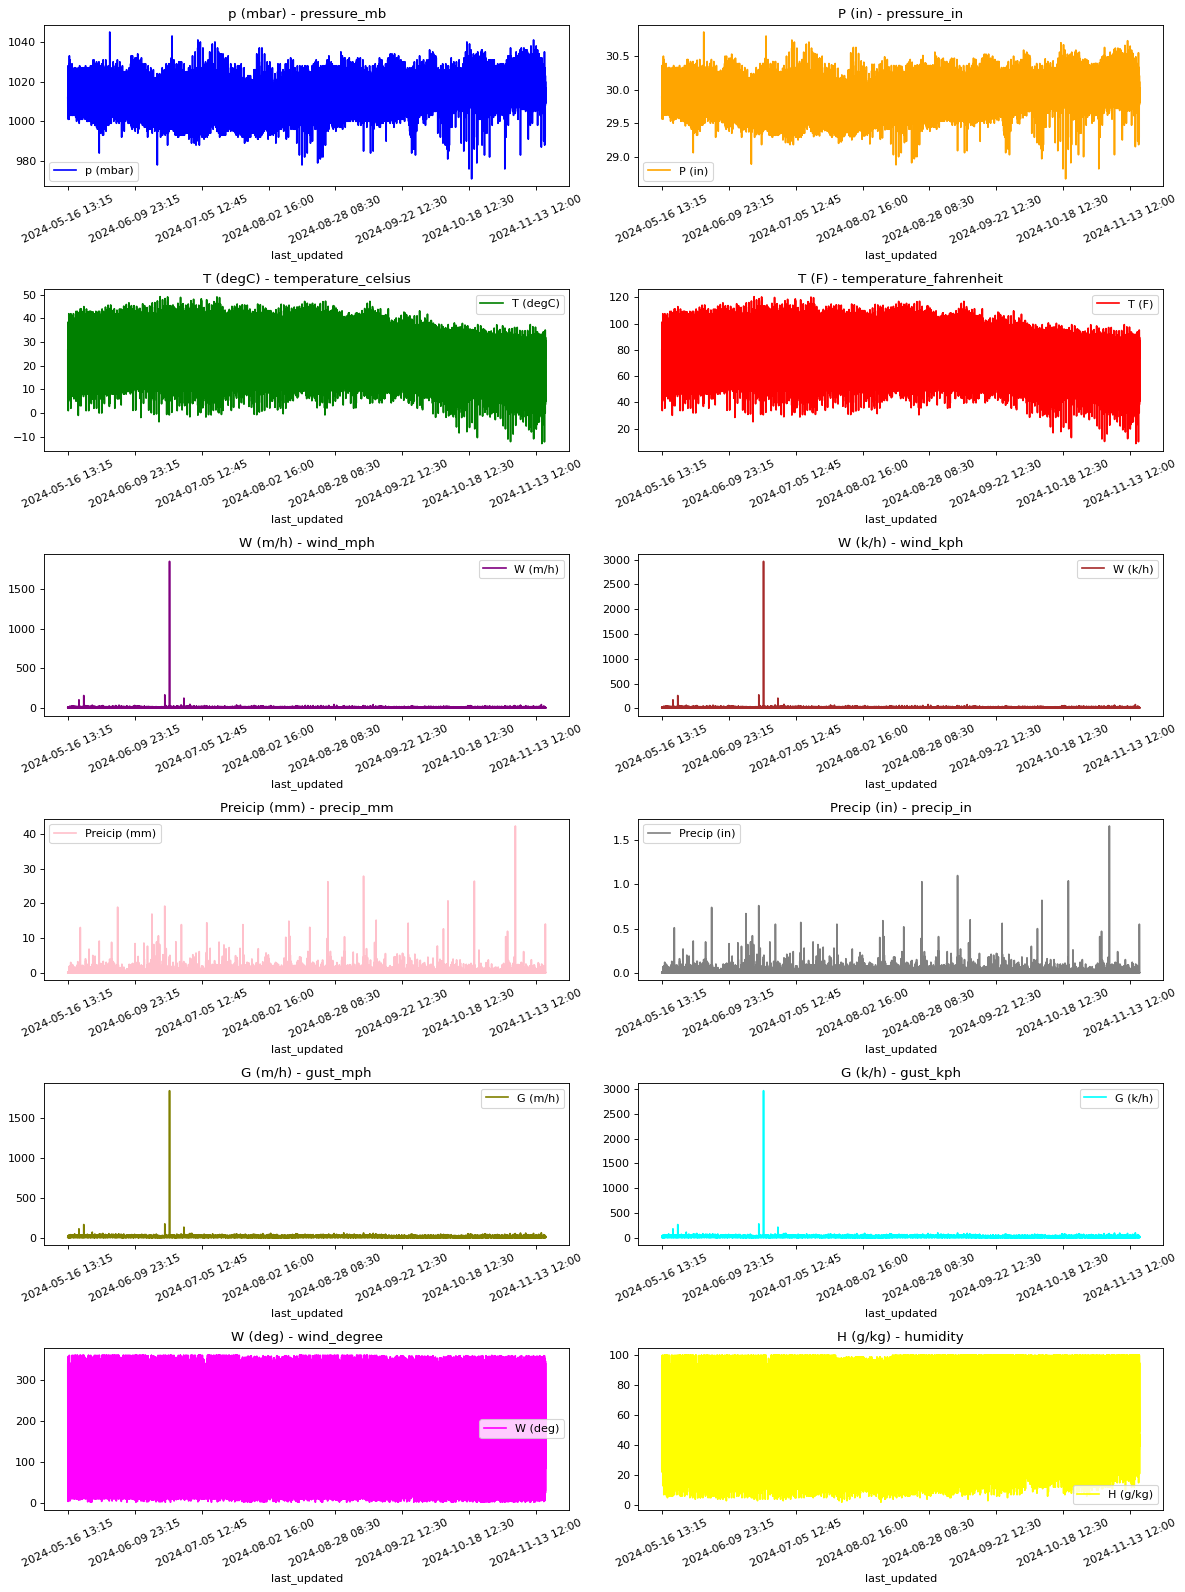

In [13]:
import matplotlib.pyplot as plt

feature_keys = [
    "pressure_mb", "pressure_in", "temperature_celsius", "temperature_fahrenheit",
    "wind_mph", "wind_kph",  "precip_mm", "precip_in", "gust_mph", "gust_kph", "wind_degree", "humidity"
]

titles = [
    "p (mbar)", "P (in)", "T (degC)", "T (F)", "W (m/h)",
    "W (k/h)", "Preicip (mm)", "Precip (in)", "G (m/h)",
    "G (k/h)", "W (deg)", "H (g/kg)"
]

colors = [
    "blue", "orange", "green", "red", "purple",
    "brown", "pink", "gray", "olive", "cyan", "magenta", "yellow"
]

date_time_key = "last_updated"

def plot_single_feature(ax, title, key, color, time_data, data):
    t_data = data[key]
    t_data.index = time_data
    t_data.plot(ax=ax, color=color, title="{} - {}".format(title, key), rot=25)
    ax.legend([title])


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=6, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i, (title, key, color) in enumerate(zip(titles, feature_keys, colors)):
        plot_single_feature(axes[i // 2, i % 2], title, key, color, time_data, data)
    plt.tight_layout()


# Assuming 'df' is your DataFrame
show_raw_visualization(df)

In [27]:
split_fraction = 0.715
train_split = int(split_fraction * len(df))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 128
epochs = 10


def normalize_data(data, train_split):
    data_mean = np.mean(data[:train_split], axis=0)
    data_std = np.std(data[:train_split], axis=0)
    normalized_data = (data - data_mean) / data_std
    return normalized_data

In [28]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 2, 4, 6, 8, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 2, 4, 6, 8, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize_data(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: p (mbar), T (degC), W (m/h), Preicip (mm), G (m/h), H (g/kg)


In [29]:
start = past + future
end = start + train_split

# Assuming 'train_data' and 'normalized_features' are available

# Extracting input features (x_train) and target variable (y_train)
x_train = train_data.iloc[start:end, :7].values
y_train = features.iloc[start:end, 3].values.reshape(-1, 1)

sequence_length = int(past / step)

# Printing the shapes for verification
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("Sequence length:", sequence_length)

x_train shape: (24729, 6)
y_train shape: (25521, 1)
Sequence length: 120


In [30]:
start = past + future
end = start + train_split

# Assuming 'train_data', 'features', 'past', 'future', and 'step' are available

x_train = train_data.iloc[start:end, :6].values
y_train = features.iloc[start:end, 3].values.reshape(-1, 1)

sequence_length = int(past / step)

In [31]:
import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [32]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(6)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (128, 120, 6)
Target shape: (128, 1)


In [33]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 120, 6)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,025 (19.63 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming 'model', 'dataset_train', 'epochs', and 'dataset_val' are available

path_checkpoint = "model_checkpoint.weights.h5"

es_callback = EarlyStopping(monitor="val_loss", min_delta=0, patience=7)

modelckpt_callback = ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9535
Epoch 1: val_loss improved from inf to 1.62866, saving model to model_checkpoint.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.9541 - val_loss: 1.6287
Epoch 2/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9523
Epoch 2: val_loss improved from 1.62866 to 1.62549, saving model to model_checkpoint.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.9530 - val_loss: 1.6255
Epoch 3/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9518
Epoch 3: val_loss improved from 1.62549 to 1.62197, saving model to model_checkpoint.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.9525 - val_loss: 1.6220
Epoch 4/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9514
Epoch 4: val_loss improved from 1.62197 to 1.61647, saving model to model_checkpoint.weights.h5
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.9520 - val_loss: 1.6165
Epoch 5/10
187/188 ━━━━━━━━━━━━━━━━━━━━ 

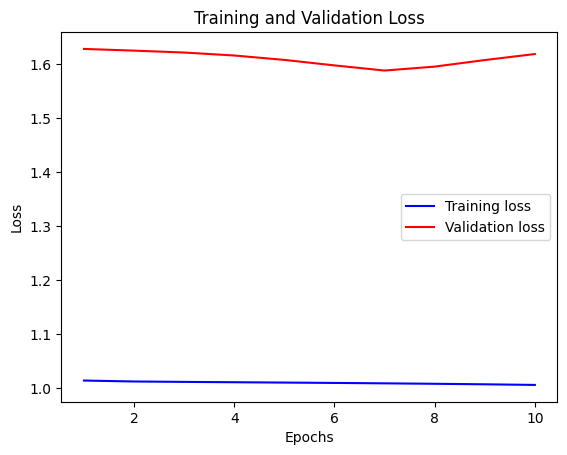

In [35]:
import matplotlib.pyplot as plt

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training and Validation Loss")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


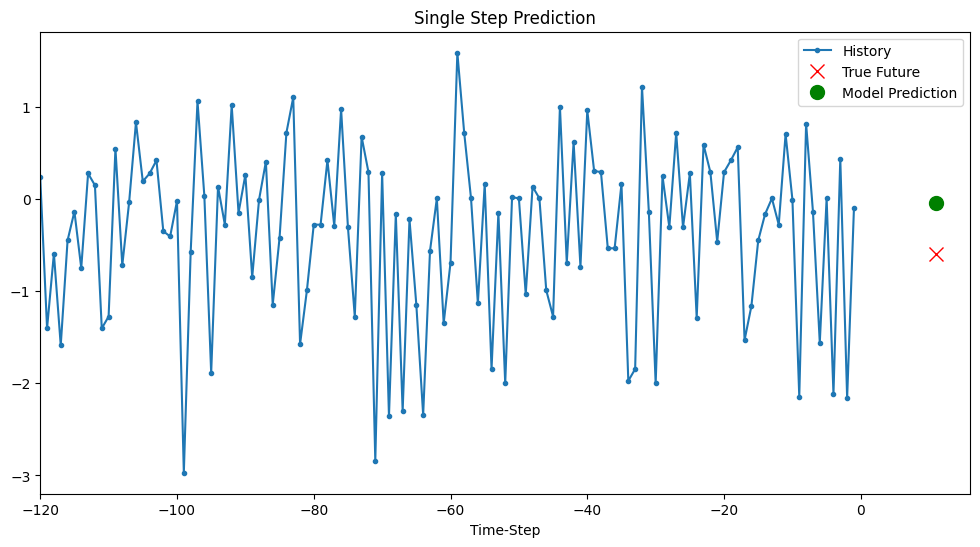

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


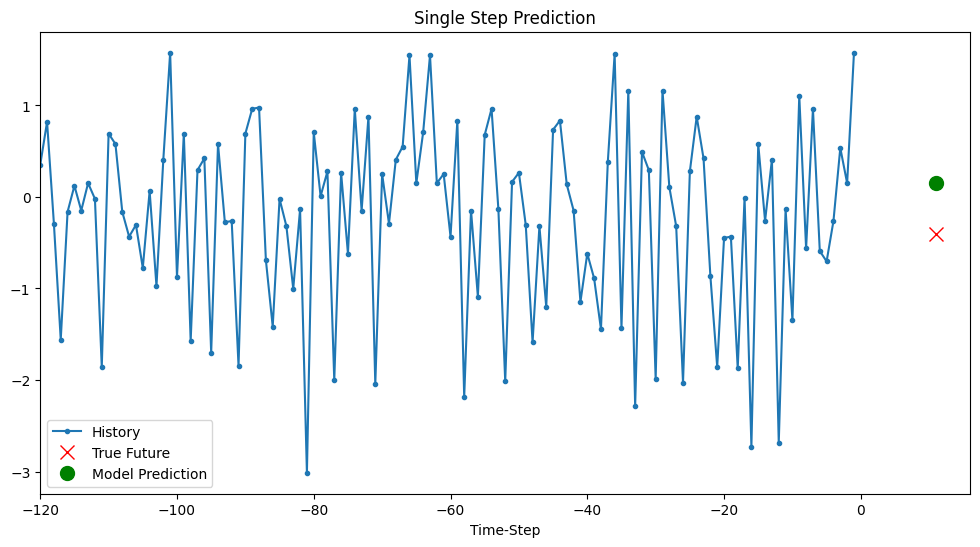

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


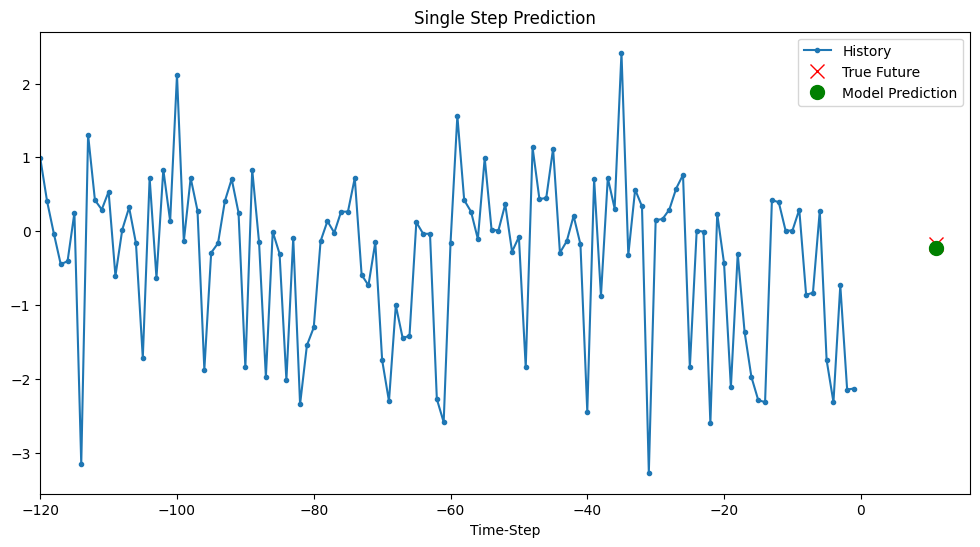

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


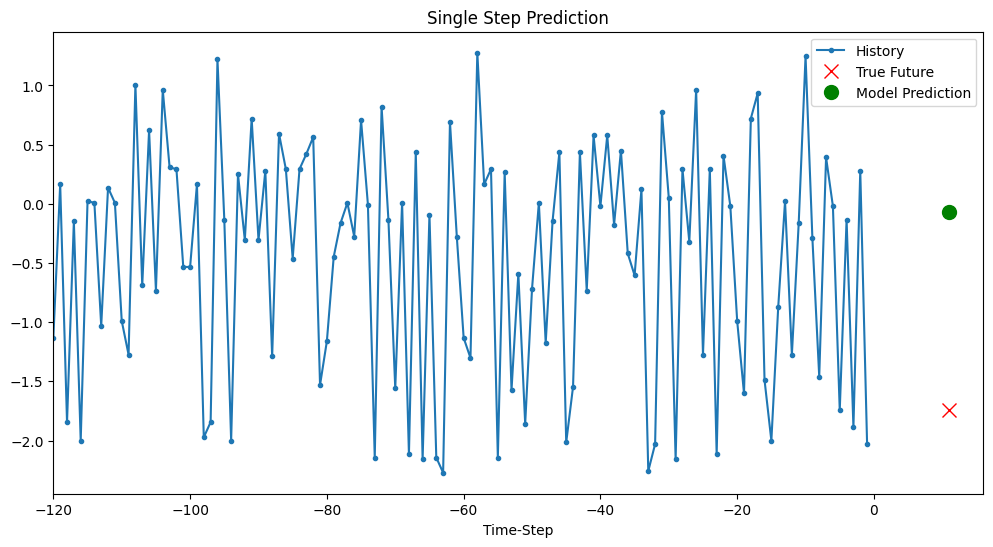

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


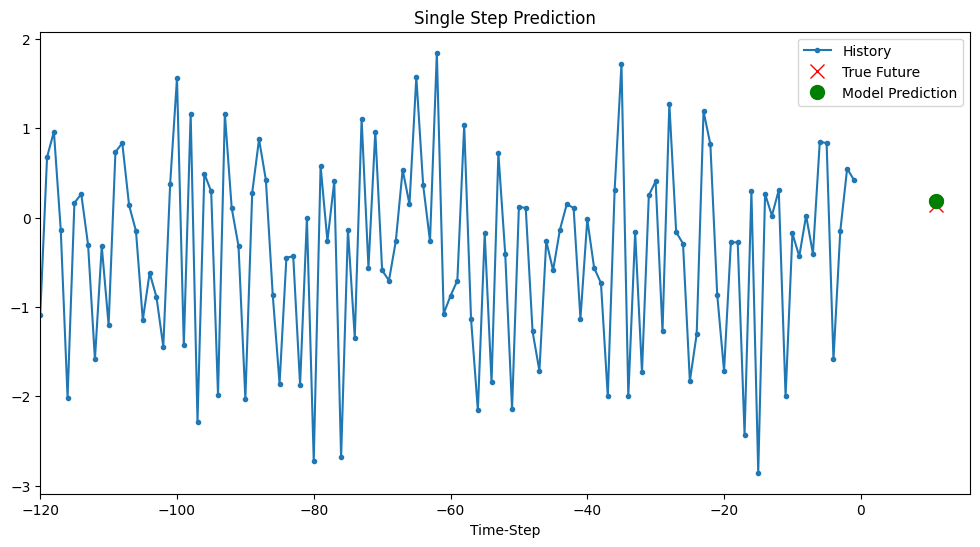

In [36]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))

    if delta:
        future = delta
    else:
        future = 0

    plt.figure(figsize=(12, 6))
    plt.title(title)

    for i, val in enumerate(plot_data):
        if i:
            plt.plot(time_steps[-1] + future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])

    plt.legend()
    plt.xlim([time_steps[0], time_steps[-1] + future + 5])
    plt.xlabel("Time-Step")
    plt.show()

for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )